In [1]:
import numpy as np 
import pandas as pd 
import os 
import pickle 

In [2]:
data_dir = '/Users/brandonmcclung/Data/KSC_Weather_Archive/MERLIN_CG_2017_2023/'
files = os.listdir(data_dir)
yrs = ['2017','2018','2019','2020','2021','2022','2023']
file_type = '.dat'
col_headers = ['Date','Lat','Lon','SigStrength','real','SemiMajorAxis','SemiMinorAxis','EllipseAngle']
for yr in yrs:
    if yr=='2017':
        print(yr)
        merlin_cg = pd.read_csv(data_dir+yr+file_type,header=None, usecols=[0,1,2,3,4,5,6,7],\
            names=col_headers,index_col=0, sep=',')
    else:
        print(yr)
        temp = pd.read_csv(data_dir+yr+file_type,header=None, usecols=[0,1,2,3,4,5,6,7],\
            names=col_headers,index_col=0, sep=',')
        merlin_cg = merlin_cg.append(temp)
merlin_cg.drop(columns='real')

data_stor = '/Users/brandonmcclung/Data/'
file = open(data_stor+'merlin_cg_df.p','wb')
pickle.dump(merlin_cg,file)
file.close()

2017
2018


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


2019


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


2020


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


2021


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


2022


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


2023


/var/folders/nk/vl3n0lp13k7b3tt0mx4qkydh0000gn/T/ipykernel_14115/2930067735.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merlin_cg = merlin_cg.append(temp)


## Data Exploration

### Histograms

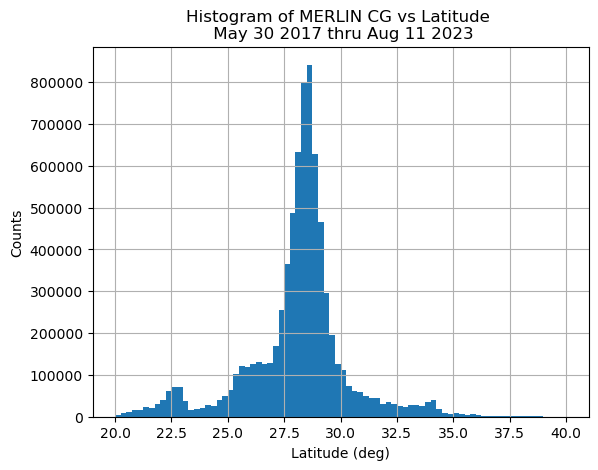

In [3]:
import matplotlib.pyplot as plt
merlin_cg.hist('Lat',bins = np.linspace(20,40,81))
plt.xlabel('Latitude (deg)')
plt.ylabel('Counts')
plt.title('Histogram of MERLIN CG vs Latitude \n May 30 2017 thru Aug 11 2023')
plt.savefig('hist_lat_merlin_cg.jpeg')

The figure above shows the latitude on the x axis and the number of CG lightning records from May 2017 through August 2023.  The histogram is binned by .5 degree increments.  This shows the peak of the CG lightning strikes occurring between 27.5 and 30 degrees latitude, with a maximum over 800 thousand.  There appears to be some bias towards the more equatorward bins, with some local minima appearing near 22.5-23.5 degrees.  Above 29 degrees, toward the northern latitudes, there appears to be a near normal distribution.  The total number of lightning events is 7626226.  This count makes sense when compared to the 2021 US lightning summary from vaisala.  (chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.vaisala.com/sites/default/files/documents/WEA-MET-2021-Annual-Lightning-Report-B212465EN-A.pdf)

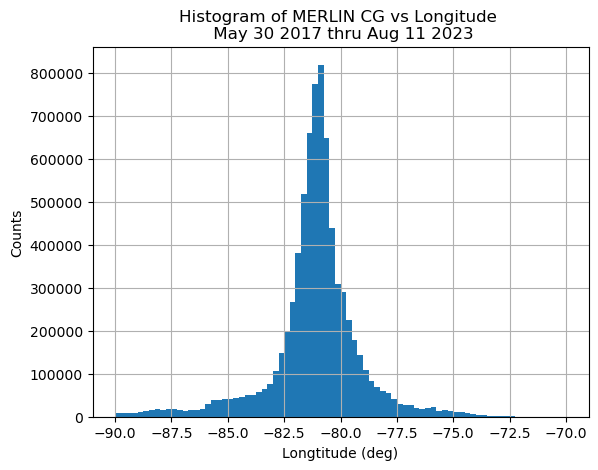

In [14]:
merlin_cg.hist('Lon',bins=np.linspace(-90,-70,81))
plt.xlabel('Longtitude (deg)')
plt.ylabel('Counts')
plt.title('Histogram of MERLIN CG vs Longitude \n May 30 2017 thru Aug 11 2023')
plt.savefig('hist_lon_merlin_cg.jpeg')

The figure above shows a histogram binned every .5 degrees, binning the CG records from May 2017 through early August 2023.  Longitude is plotted on the X axis with the count of CG records plotted on the y-axis.  This distribution shows a near normal distribution with a maximum occurring between -82.5 and -80 degrees East.  

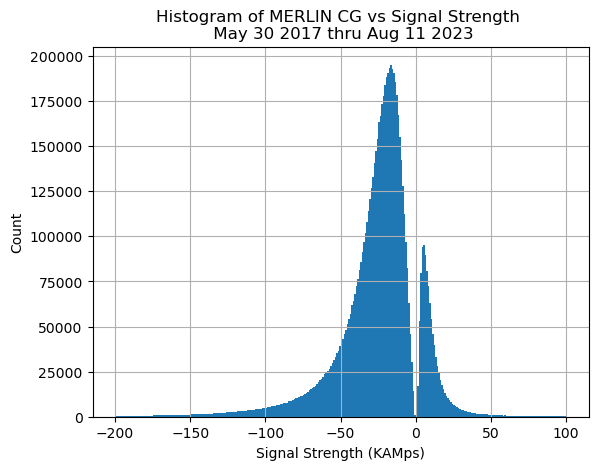

In [11]:
merlin_cg.hist('SigStrength',bins=np.linspace(-200,100,301))
plt.xlabel('Signal Strength (KAMps)')
plt.ylabel('Count')
plt.title('Histogram of MERLIN CG vs Signal Strength \n May 30 2017 thru Aug 11 2023')
plt.savefig('hist_sigstrenth_merlin_cg.jpeg')

This figure demonstrates the signal strength and polarity of the lightning strikes from May 2017 through August 2023.  You can see a bi-modal structure in the data, indicating the difference between the positive and negative CG strikes. From this plot it is clear that there are significantly more negative lightning strikes, than positive lightning strikes.  It will be important not to undersample the positive lightning strikes when developing the ML algorithm.  

array([[<AxesSubplot:title={'center':'SemiMajorAxis'}>]], dtype=object)

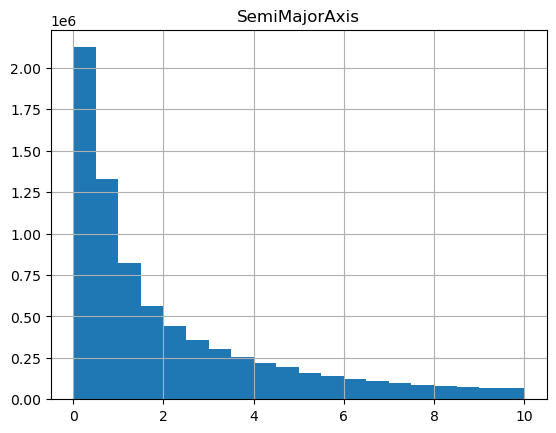

In [20]:
merlin_cg.hist('SemiMajorAxis',bins=np.linspace(0,10,21))

array([[<AxesSubplot:title={'center':'SemiMinorAxis'}>]], dtype=object)

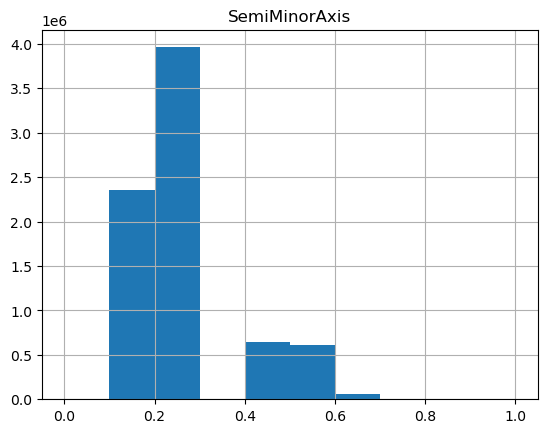

In [21]:
merlin_cg.hist('SemiMinorAxis', bins=np.linspace(0,1,11))

array([[<AxesSubplot:title={'center':'EllipseAngle'}>]], dtype=object)

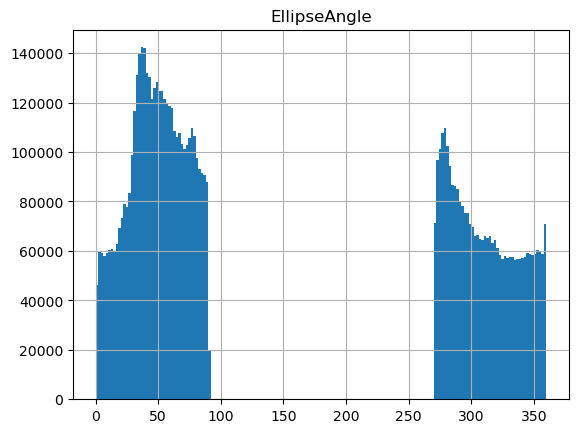

In [24]:
merlin_cg.hist('EllipseAngle',bins=np.linspace(0,360,181))

In [15]:
merlin_cg

,Lat,Lon,SigStrength,real,SemiMajorAxis,SemiMinorAxis,EllipseAngle
Date,,,,,,,
05/30/2017 19:48:30,29.424999,-82.881666,4.7,'Real',2.9,0.4,325
05/30/2017 19:48:32,30.581943,-81.607222,-19.5,'Real',0.2,0.1,272
05/30/2017 19:48:32,30.581943,-81.607777,-8.3,'Real',0.2,0.2,274
05/30/2017 19:48:32,30.581666,-81.607500,-29.9,'Real',0.3,0.1,277
05/30/2017 19:48:32,29.245555,-82.529443,3.9,'Real',0.2,0.2,42
...,...,...,...,...,...,...,...
08/11/2023 23:58:13,29.035833,-81.009167,-7.4,'Real',3.4,0.4,345
08/11/2023 23:58:13,29.042778,-81.007500,-19.8,'Real',0.8,0.1,336
08/11/2023 23:58:13,29.047778,-81.007778,-11.1,'Real',1.4,0.2,339
